In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import Dataset
train = pd.read_csv('Data Sets/train.csv')
test = pd.read_csv('Data Sets/test.csv')

In [3]:
train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [4]:
test.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [5]:
# merge train and test set
train['train'] = "YES"
test['train'] = "NO"

In [6]:
all_data = pd.concat([train,test],ignore_index=True)

In [7]:
all_data.shape,train.shape, test.shape

((1956, 7), (1157, 6), (799, 6))

In [8]:
all_data.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,train,ID
1951,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,NaN,NO,794.0
1952,_2viQ_Qnc689m-WiwOwvrQU7LvkLAgspnfXL8ovE0ME,TheHotChocolate,2013-07-13T18:26:37.017000,she is sooooo beautiful!,NaN,NO,795.0
1953,_2viQ_Qnc6_1Hq9MGlefkBIszt9rYD3S_CozADvMhQ4,Dinova Sharon,2013-07-13T14:44:00.700000,well done shakira,NaN,NO,796.0
1954,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,NaN,NO,797.0
1955,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,NaN,NO,798.0


In [9]:
all_data.CLASS = all_data.CLASS.fillna(0)

In [10]:
all_data.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,train,ID
1951,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,0.0,NO,794.0
1952,_2viQ_Qnc689m-WiwOwvrQU7LvkLAgspnfXL8ovE0ME,TheHotChocolate,2013-07-13T18:26:37.017000,she is sooooo beautiful!,0.0,NO,795.0
1953,_2viQ_Qnc6_1Hq9MGlefkBIszt9rYD3S_CozADvMhQ4,Dinova Sharon,2013-07-13T14:44:00.700000,well done shakira,0.0,NO,796.0
1954,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0.0,NO,797.0
1955,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0.0,NO,798.0


In [11]:
all_data.shape

(1956, 7)

In [12]:
all_data = all_data[['CONTENT','CLASS']]
all_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1.0
1,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1.0
2,watch?v=vtaRGgvGtWQ Check this out .﻿,1.0
3,Subscribe to my channel ﻿,1.0
4,and u should.d check my channel and tell me wh...,1.0


In [13]:
print(all_data)

                                                CONTENT  CLASS
0     Huh, anyway check out this you[tube] channel: ...    1.0
1      me shaking my sexy ass on my channel enjoy ^_^ ﻿    1.0
2               watch?v=vtaRGgvGtWQ   Check this out .﻿    1.0
3                             Subscribe to my channel ﻿    1.0
4     and u should.d check my channel and tell me wh...    1.0
...                                                 ...    ...
1951  Hey Music Fans I really appreciate all of you ...    0.0
1952                           she is sooooo beautiful!    0.0
1953                                  well done shakira    0.0
1954  I love this song because we sing it at Camp al...    0.0
1955                         Shakira is the best dancer    0.0

[1956 rows x 2 columns]


In [14]:
import re
# CLeaning the texts

corpus = []
for i in range(0, all_data.shape[0]):
    review = re.sub("[^a-zA-Z]", " ", all_data["CONTENT"][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)
    
corpus

['huh anyway check tube channel kobyoshi',
 'shake sexi ass channel enjoy',
 'watch v vtarggvgtwq check',
 'subscrib channel',
 'u check channel tell next',
 'start read stop subscrib within one day entir famili die want stay aliv subscrib right',
 'http twitter com gbphotographygb',
 'pleas like http premium easypromosapp com votem',
 'hello like game art video scientif experi tutori lyric video much much pleas check channel subscrib start soon hope abl cover expect also check got far',
 'check view',
 'show auburn pride http www teespr com tigermeathoodi',
 'check channel',
 'hey guy im yr old music produc make chiptun bit music would wonder check bit remix even gangnamstyl bit remix would like check thank',
 'dont even watch anymor come check billion',
 'subscrib free android game app',
 'everyon pleas come check newest song memori martin luther king jr',
 'sub channel reason',
 'check dubstep song firebal made fruiti loop realli took time watch v teloa rio',
 'billion come soon',
 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [16]:
X = x[:train.shape[0]]
test_values = x[train.shape[0]:]

In [17]:
X.shape

(1157, 3544)

In [18]:
test_values.shape

(799, 3544)

In [19]:
y = train["CLASS"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)

## Model

In [21]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifierDecision=DecisionTreeClassifier()
classifierDecision.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=classifierDecision.predict(X_test)
y_train_pred = classifierDecision.predict(X_train)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print('Classification accuracy =',accuracy_score(y_test,y_pred)*100,'%\n')
print(classification_report(y_test,y_pred))

[[144   3]
 [ 10 133]]
Classification accuracy = 95.51724137931035 %

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       147
           1       0.98      0.93      0.95       143

    accuracy                           0.96       290
   macro avg       0.96      0.95      0.96       290
weighted avg       0.96      0.96      0.96       290



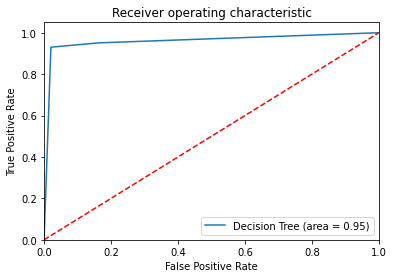

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifierDecision.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, classifierDecision.predict_proba(X_test)[:,1])


plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

In [25]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

classifierlog = LogisticRegression()
classifierlog.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred1=classifierlog.predict(X_test)
y_train_pred1 = classifierlog.predict(X_train)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred1))
print('Classification accuracy =',accuracy_score(y_test,y_pred1)*100,'%\n')
print(classification_report(y_test,y_pred1))

[[142   5]
 [ 11 132]]
Classification accuracy = 94.48275862068965 %

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.96      0.92      0.94       143

    accuracy                           0.94       290
   macro avg       0.95      0.94      0.94       290
weighted avg       0.95      0.94      0.94       290



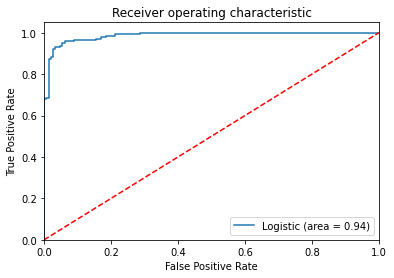

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifierlog.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, classifierlog.predict_proba(X_test)[:,1])


plt.plot(fpr, tpr, label='Logistic (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

In [29]:
# Support Vector Machine(Linear)

from sklearn import svm
svc = svm.SVC(kernel ='linear', C = 1,probability=True)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [30]:
y_pred2 = svc.predict(X_test)
y_train_pred2 = svc.predict(X_train)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred2))
print('Classification accuracy =',accuracy_score(y_test,y_pred2)*100,'%\n')
print(classification_report(y_test,y_pred2))

[[139   8]
 [ 12 131]]
Classification accuracy = 93.10344827586206 %

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       147
           1       0.94      0.92      0.93       143

    accuracy                           0.93       290
   macro avg       0.93      0.93      0.93       290
weighted avg       0.93      0.93      0.93       290



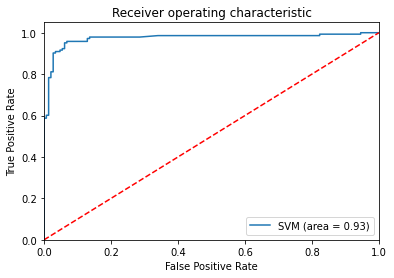

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, svc.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])


plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

## Test Data

In [33]:
final_labels = classifierDecision.predict(test_values)

In [34]:
final_labels

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
len(final_labels)

799

In [36]:
final_result = pd.DataFrame({'ID': test['ID'], 'CLASS': final_labels})

In [37]:
final_result.dtypes

ID       int64
CLASS    int64
dtype: object

In [38]:
final_result.CLASS.dtype

dtype('int64')

In [39]:
final_result.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [41]:
final_result.to_csv('Final.csv', index=False)